In [2]:
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries
import os
import pandas as pd

In [6]:
df_dc = pd.read_csv('./data/EURUSD.csv')

In [7]:
rounded_df = df_dc.round(4)

In [8]:
df_av = pd.read_csv('./data/EURUSD_AV.csv')

In [9]:
display(df_dc.head(5))
display(df_av.head(5))
display(rounded_df.head(5))

Gmt time     Open     High      Low    Close      Volume
0  04.05.2003 21:00:00.000  1.12354  1.12354  1.12279  1.12331  24206.5996
1  04.05.2003 22:00:00.000  1.12290  1.12317  1.12240  1.12251  23023.5996
2  04.05.2003 23:00:00.000  1.12255  1.12255  1.12176  1.12179  24839.6992
3  05.05.2003 00:00:00.000  1.12177  1.12318  1.12166  1.12274  23463.1992
4  05.05.2003 01:00:00.000  1.12242  1.12276  1.12119  1.12150  25406.5996

date  1. open  2. high  3. low  4. close  5. volume
0  2020-08-17 06:00:00   1.1855   1.1855  1.1846    1.1853        0.0
1  2020-08-17 05:00:00   1.1838   1.1856  1.1835    1.1855        0.0
2  2020-08-17 04:00:00   1.1853   1.1854  1.1827    1.1837        0.0
3  2020-08-17 03:00:00   1.1862   1.1866  1.1842    1.1853        0.0
4  2020-08-17 02:00:00   1.1861   1.1868  1.1856    1.1862        0.0

Gmt time    Open    High     Low   Close      Volume
0  04.05.2003 21:00:00.000  1.1235  1.1235  1.1228  1.1233  24206.5996
1  04.05.2003 22:00:00.000  1.1229  1.1232  1.1224  1.1225  23023.5996
2  04.05.2003 23:00:00.000  1.1226  1.1226  1.1218  1.1218  24839.6992
3  05.05.2003 00:00:00.000  1.1218  1.1232  1.1217  1.1227  23463.1992
4  05.05.2003 01:00:00.000  1.1224  1.1228  1.1212  1.1215  25406.5996

In [5]:
df_dc.rename(columns={'Gmt time':'date'}, inplace=True)
df_dc['date'] = pd.to_datetime(df_dc['date'])
df_dc['date'] = pd.to_datetime(df_dc['date'], format='%Y-%m-%d %H:%M:%S')
df_dc.sort_values('date', inplace=True)

In [246]:
#df_dc.set_index('date', inplace=True)

In [6]:
df_dc.reset_index(inplace=True)

In [7]:
df_dc.drop(columns='index', inplace=True)

In [8]:
df_dc

date     Open     High      Low    Close       Volume
0      2003-01-06 21:00:00  1.17079  1.17464  1.17058  1.17119   30805.1992
1      2003-01-06 22:00:00  1.17112  1.17177  1.17066  1.17123   27399.4004
2      2003-01-06 23:00:00  1.17134  1.17264  1.17092  1.17203   30777.4004
3      2003-01-07 00:00:00  1.15201  1.15271  1.15134  1.15169   28667.1992
4      2003-01-07 01:00:00  1.15204  1.15398  1.15169  1.15237   30138.5000
5      2003-01-07 02:00:00  1.15196  1.15231  1.15107  1.15141   28635.4004
6      2003-01-07 03:00:00  1.15149  1.15213  1.15123  1.15213   28013.4004
7      2003-01-07 04:00:00  1.15190  1.15196  1.15085  1.15132   28809.6992
8      2003-01-07 05:00:00  1.15132  1.15272  1.15093  1.15215   26359.9004
9      2003-01-07 06:00:00  1.15187  1.15232  1.15085  1.15127   28110.5996
10     2003-01-07 07:00:00  1.15133  1.15310  1.15045  1.15213   27621.1992
11     2003-01-07 08:00:00  1.15218  1.15483  1.15132  1.15350   26333.8008
12     2003-01-07 09:00:00  1.15366  1.15442  1.15247  1.15298   25983.5000
13     2003-01-07 10:00:00  1.15310  1.15552  1.15227  1.15516   26167.0996
14     2003-01-07 11:00:00  1.15518  1.15658  1.15474  1.15476   26247.3008
15     2003-01-07 12:00:00  1.15494  1.15620  1.15423  1.15436   28548.5000
16     2003-01-07 13:00:00  1.15403  1.15443  1.15256  1.15303   28468.5996
17     2003-01-07 14:00:00  1.15309  1.15547  1.15251  1.15514   27621.6992
18     2003-01-07 15:00:00  1.15529  1.16069  1.15512  1.15955   25648.9004
19     2003-01-07 16:00:00  1.15920  1.15947  1.15714  1.15758  294472.0000
20     2003-01-07 17:00:00  1.15770  1.15862  1.15717  1.15804  135605.7969
21     2003-01-07 18:00:00  1.15825  1.15838  1.15678  1.15756  146710.7969
22     2003-01-07 19:00:00  1.15735  1.15794  1.15570  1.15607  106424.6016
23     2003-01-07 20:00:00  1.15587  1.15638  1.15537  1.15578   65844.2031
24     2003-01-07 21:00:00  1.15549  1.15634  1.15526  1.15578   29095.9004
25     2003-01-07 22:00:00  1.15568  1.15645  1.15568  1.15633   25108.1992
26     2003-01-07 23:00:00  1.15632  1.15653  1.15583  1.15613   29323.4004
27     2003-01-08 00:00:00  1.12350  1.12405  1.12290  1.12325   28326.4004
28     2003-01-08 01:00:00  1.12293  1.12388  1.12211  1.12271   28938.5996
29     2003-01-08 02:00:00  1.12316  1.12421  1.12302  1.12380   29451.5000
...                    ...      ...      ...      ...      ...          ...
107949 2020-12-06 18:00:00  1.12239  1.12338  1.12210  1.12309   15034.1104
107950 2020-12-06 19:00:00  1.12309  1.12532  1.12309  1.12527   10224.4805
107951 2020-12-06 20:00:00  1.12527  1.12619  1.12513  1.12550    3889.0925
107952 2020-12-07 21:00:00  1.13039  1.13055  1.13026  1.13039     146.4400
107953 2020-12-07 22:00:00  1.13039  1.13158  1.13039  1.13157    2546.2749
107954 2020-12-07 23:00:00  1.13157  1.13173  1.13084  1.13085    3114.9099
107955 2020-12-08 00:00:00  1.17348  1.17428  1.17260  1.17338    6069.1700
107956 2020-12-08 01:00:00  1.17339  1.17411  1.17247  1.17292   36296.0001
107957 2020-12-08 02:00:00  1.17292  1.17320  1.17159  1.17202   62383.0512
107958 2020-12-08 03:00:00  1.17201  1.17247  1.17162  1.17211    5068.4500
107959 2020-12-08 04:00:00  1.17211  1.17211  1.17110  1.17141    6033.2701
107960 2020-12-08 05:00:00  1.17141  1.17249  1.17121  1.17230    3608.2000
107961 2020-12-08 06:00:00  1.17231  1.17385  1.17206  1.17256   16971.4102
107962 2020-12-08 07:00:00  1.17256  1.17501  1.17251  1.17484   29527.3103
107963 2020-12-08 08:00:00  1.17485  1.17605  1.17411  1.17475   15567.2900
107964 2020-12-08 09:00:00  1.17475  1.17752  1.17444  1.17675   13606.6000
107965 2020-12-08 10:00:00  1.17678  1.17790  1.17639  1.17780   12789.1000
107966 2020-12-08 11:00:00  1.17780  1.17787  1.17558  1.17665   22682.1398
107967 2020-12-08 12:00:00  1.17667  1.17957  1.17614  1.17905   25186.9799
107968 2020-12-08 13:00:00  1.17905  1.18012  1.17800  1.17812   79063.5217
107969 2020-12-08 14:00:00  1.17811  1.18170  1.17720  1.18051  155291

In [9]:
import pytz

In [10]:
df_av['date'] = pd.to_datetime(df_av['date'])
df_av.sort_values('date', inplace=True)
df_av.set_index('date', inplace=True)1855

In [12]:
df_av.index = df_av.index.tz_localize('US/Eastern').tz_convert(pytz.UTC)

In [308]:
#df_av.reset_index(inplace=True)

In [299]:
#df_av['date'] = pd.to_datetime(df_av['date'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df_full = pd.merge(df_av, df_dc, left_index=True, right_on='date',)

In [14]:
df_full

1. open  2. high  3. low  4. close  5. volume                date  \
107161   1.1643   1.1646  1.1639    1.1644        0.0 2020-07-26 21:00:00   
107162   1.1644   1.1655  1.1642    1.1652        0.0 2020-07-26 22:00:00   
107163   1.1653   1.1656  1.1641    1.1649        0.0 2020-07-26 23:00:00   
107164   1.1650   1.1699  1.1648    1.1689        0.0 2020-07-27 00:00:00   
107165   1.1688   1.1699  1.1684    1.1692        0.0 2020-07-27 01:00:00   
107166   1.1692   1.1716  1.1688    1.1710        0.0 2020-07-27 02:00:00   
107167   1.1710   1.1725  1.1706    1.1711        0.0 2020-07-27 03:00:00   
107168   1.1711   1.1712  1.1699    1.1705        0.0 2020-07-27 04:00:00   
107169   1.1705   1.1705  1.1694    1.1701        0.0 2020-07-27 05:00:00   
107170   1.1700   1.1717  1.1699    1.1709        0.0 2020-07-27 06:00:00   
107171   1.1709   1.1714  1.1688    1.1696        0.0 2020-07-27 07:00:00   
107172   1.1696   1.1712  1.1692    1.1695        0.0 2020-07-27 08:00:00   
107173   1.1695   1.1708  1.1680    1.1706        0.0 2020-07-27 09:00:00   
107174   1.1706   1.1733  1.1703    1.1725        0.0 2020-07-27 10:00:00   
107175   1.1726   1.1745  1.1716    1.1744        0.0 2020-07-27 11:00:00   
107176   1.1744   1.1764  1.1734    1.1738        0.0 2020-07-27 12:00:00   
107177   1.1739   1.1760  1.1726    1.1759        0.0 2020-07-27 13:00:00   
107178   1.1759   1.1778  1.1746    1.1777        0.0 2020-07-27 14:00:00   
107179   1.1777   1.1782  1.1748    1.1748        0.0 2020-07-27 15:00:00   
107180   1.1749   1.1758  1.1742    1.1745        0.0 2020-07-27 16:00:00   
107181   1.1745   1.1757  1.1744    1.1755        0.0 2020-07-27 17:00:00   
107182   1.1755   1.1765  1.1749    1.1750        0.0 2020-07-27 18:00:00   
107183   1.1750   1.1752  1.1740    1.1745        0.0 2020-07-27 19:00:00   
107184   1.1745   1.1752  1.1742    1.1751        0.0 2020-07-27 20:00:00   
107185   1.1752   1.1754  1.1744    1.1749        0.0 2020-07-27 21:00:00   
107186   1.1748   1.1764  1.1748    1.1763        0.0 2020-07-27 22:00:00   
107187   1.1764   1.1769  1.1750    1.1768        0.0 2020-07-27 23:00:00   
107188   1.1768   1.1773  1.1758    1.1766        0.0 2020-07-28 00:00:00   
107189   1.1765   1.1774  1.1754    1.1758        0.0 2020-07-28 01:00:00   
107190   1.1758   1.1763  1.1741    1.1744        0.0 2020-07-28 02:00:00   
...         ...      ...     ...       ...        ...                 ...   
107416   1.1839   1.1840  1.1812    1.1818        0.0 2020-08-13 15:00:00   
107417   1.1818   1.1822  1.1813    1.1817        0.0 2020-08-13 16:00:00   
107418   1.1817   1.1821  1.1809    1.1817        0.0 2020-08-13 17:00:00   
107419   1.1817   1.1819  1.1792    1.1798        0.0 2020-08-13 18:00:00   
107420   1.1798   1.1808  1.1795    1.1808        0.0 2020-08-13 19:00:00   
107421   1.1808   1.1817  1.1806    1.1812        0.0 2020-08-13 20:00:00   
107422   1.1813   1.1816  1.1811    1.1813        0.0 2020-08-13 21:00:00   
107423   1.1814   1.1817  1.1809    1.1817        0.0 2020-08-13 22:00:00   
107424   1.1817   1.1821  1.1813    1.1815        0.0 2020-08-13 23:00:00   
107425   1.1815   1.1816  1.1805    1.1809        0.0 2020-08-14 00:00:00   
107426   1.1809   1.1812  1.1800    1.1811        0.0 2020-08-14 01:00:00   
107427   1.1812   1.1813  1.1804    1.1809        0.0 2020-08-14 02:00:00   
107428   1.1809   1.1814  1.1801    1.1810        0.0 2020-08-14 03:00:00   
107429   1.1810   1.1819  1.1806    1.1813        0.0 2020-08-14 04:00:00   
107430   1.1813   1.1822  1.1809    1.1820        0.0 2020-08-14 05:00:00   
107431   1.1820   1.1827  1.1805    1.1808        0.0 2020-08-14 06:00:00   
107432   1.1808   1.1814  1.1789    1.1801        0.0 2020-08-14 07:00:00   
107433   1.1801   1.1818  1.1793    1.1816        0.0 2020-08-14 08:00:00   
107434   1.1816   1.1818  1.1780    1.1791        0.0 2020-08-14 09:00:00   
107435   1.1791   1.1810  1.1789    1.1809        0.0 2020-08-14 10:00:00   
1074

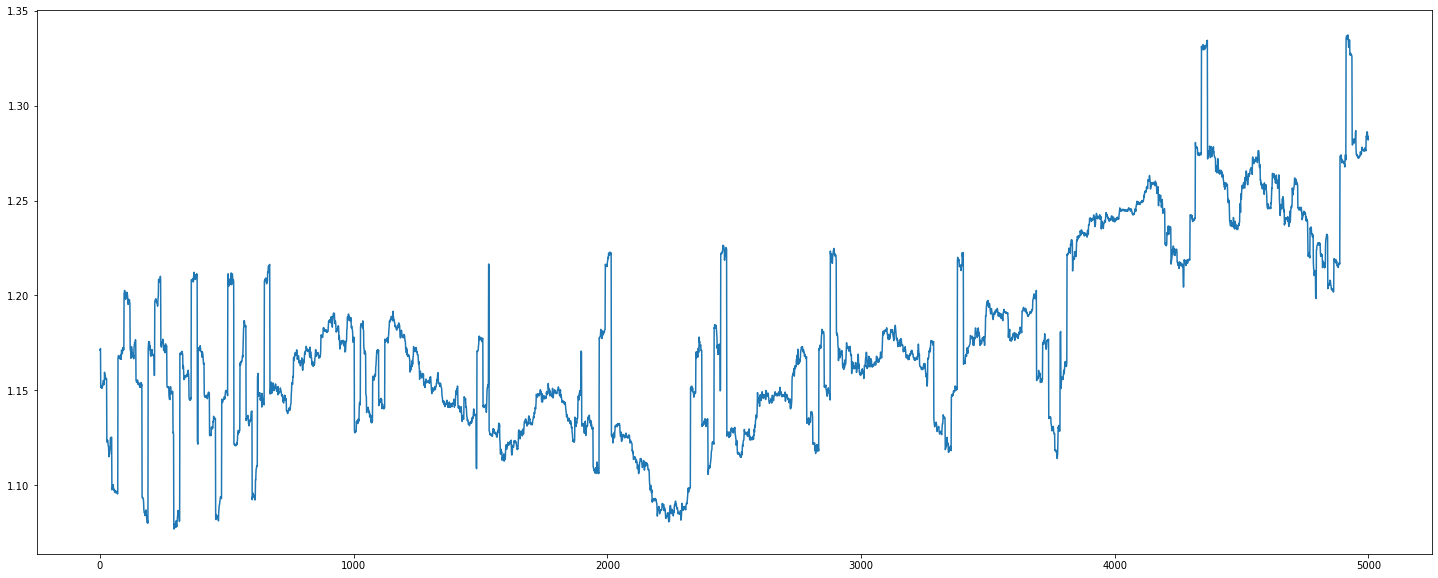

In [95]:
# Plot the data
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
cantidad = 5000
plt.plot(df_dc.index[:cantidad], df_dc.Close[:cantidad], label='Precio')
plt.show()